<a href="https://colab.research.google.com/github/arianesannt/notebooks/blob/main/Desafio_tech_challenge_organizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas importadas

In [185]:
# bibliotecas

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

# Limpeza e tratamento inicial dos dados

## Importando o dataset

In [186]:
# importando o dataset

exportacao = pd.read_csv('https://github.com/arianesannt/dados/raw/main/ExpVinho.csv', sep=';')
exportacao.head(2)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0


## Limpeza

In [187]:
# excluindo a coluna 'Id', porque não é uma informação útil para a análise

exportacao = exportacao.drop('Id', axis=1)
exportacao.head(2)

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0


In [188]:
# o problema de negócio pede que sejam analisados os últimos 15 anos
# como cada coluna representa um valor de quantidade e de valor monetario por ano, será conservado somente as últimas 30 colunas

colunas = exportacao.columns[-30:]
colunas = colunas.insert(0, 'País')
exportacao = exportacao[colunas]
exportacao.head()

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
exportacao['País'].iloc[2] = 'Alemanha'

## retirando dos dataframe os países que não compraram vinho com o brasil

In [190]:
exportacao['total'] = exportacao.sum(numeric_only=True, axis=1)
paises_comercio_zero = exportacao[exportacao['total'] == 0]
exportacao = exportacao.drop(paises_comercio_zero.index, axis=0)
exportacao = exportacao.drop('total', axis=1)
exportacao

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,Alemanha,265742,429970,225086,393482,27715,138666,36070,144150,8189,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,477,709,345,1065,0,0,0,0,4068,4761
5,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,...,37,191,219,1549,624,1864,805,2268,419,1866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,Uruguai,0,0,0,0,914,2929,1238,4404,1135,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,Venezuela,0,0,0,0,0,0,0,0,1029,...,71,355,0,0,4086,9808,26415,35944,23220,32351


In [191]:
exportacao.duplicated().sum()

0

## Separando os valores das variáveis 'quantidade' e 'valor' que hoje estão representadas no dataframe como ANO e ANO.1 respectivamente

In [192]:
# separando os valores das variáveis 'quantidade' e 'valor' que hoje estão representadas no dataframe como ANO e ANO.1 respectivamente
quantidadel = []
valoruss = []

for item in exportacao.columns:
  if item == 'País':
    quantidadel.append(item)
    valoruss.append(item)
  elif len(item) == 4:
    quantidadel.append(item)
  else:
    valoruss.append(item)

In [193]:
# criando dataframes separados para quantidade e valor

quantidade_l = exportacao[quantidadel]
quantidade_l = quantidade_l.set_index('País')
valor_uss = exportacao[valoruss]
valor_uss = valor_uss.set_index('País')

In [194]:
display(quantidade_l.head(2))
display(valor_uss.head(2))


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0


,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0


In [195]:
# retirando o '.1' do valor da coluna para que futuramente seja possível juntar as tabelas

colunas = valor_uss.columns.str[:-2]
valor_uss.columns = colunas
valor_uss.head(2)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0


## Fazendo o melt e criando um dataframe único com informações de quantidade e valor

In [196]:
# fazendo o melt e criando um dataframe único com informações de quantidade e valor

valor_uss2 = valor_uss.reset_index('País')
quantidade_l2 = quantidade_l.reset_index('País')

quantidade_l2 = quantidade_l2.melt(id_vars=['País'], value_vars=quantidade_l.columns)
valor_uss2 = valor_uss2.melt(id_vars=['País'], value_vars=valor_uss.columns)

display(quantidade_l2.head(2))
display(valor_uss2.head(2))

,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0


,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0


In [197]:
# renomeando as colunas para a correta identificação das variáveis

quantidade_l2.columns = ['pais_destino', 'ano', 'quantidade_l']
valor_uss2.columns = ['pais_destino', 'ano', 'valor_uss']

display(quantidade_l2.head(2))
display(valor_uss2.head(2))

,pais_destino,ano,quantidade_l
0,Afeganistão,2008,0
1,África do Sul,2008,0


,pais_destino,ano,valor_uss
0,Afeganistão,2008,0
1,África do Sul,2008,0


In [198]:
# fazendo o .join() entre as duas tabelas para tranasformá-la em uma só
exportacao_long = quantidade_l2.join(valor_uss2['valor_uss'])
exportacao_long.head(2)

,pais_destino,ano,quantidade_l,valor_uss
0,Afeganistão,2008,0,0
1,África do Sul,2008,0,0


In [199]:
exportacao_long.describe()

,quantidade_l,valor_uss
count,"1,755.00","1,755.00"
mean,"50,132.44","64,184.80"
std,"626,175.49","521,380.02"
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,"1,469.00","5,811.00"
max,"21,912,914.00","14,795,694.00"


In [200]:
#exportacao_long.to_csv('ExpVinho_tratado_long.csv', sep=';')

## Análises inciais

In [201]:
exportacao_long_por_pais = exportacao_long.groupby(by='pais_destino').sum(numeric_only=True)
exportacao_long_por_pais = exportacao_long_por_pais.sort_values(by='valor_uss', ascending=False)
exportacao_long_por_pais.sum()

quantidade_l     87982432
valor_uss       112644316
dtype: int64

In [218]:
exportacao_long_por_pais_top10 = exportacao_long_por_pais.head(10)
exportacao_long_por_pais_top10 = exportacao_long_por_pais_top10.reset_index('pais_destino')
exportacao_long_por_pais_top10.head()

,pais_destino,quantidade_l,valor_uss
0,Paraguai,29214770,38719031
1,Rússia,39029799,25504484
2,Estados Unidos,3563355,9684567
3,China,2509458,4746525
4,Reino Unido,1239551,4711464


In [214]:
df_aux = pd.read_excel('https://github.com/arianesannt/dados/raw/main/codigo_iso-alpha_top10_paises_importadores_vinho.xlsx')
df_aux.head()

,cod_num,pais,iso_alpha
0,600,Paraguai,PRY
1,643,Rússia,RUS
2,840,Estados Unidos,USA
3,156,China,CHN
4,826,Reino Unido,GBR


In [219]:
# fazendo o .join() entre as duas tabelas para tranasformá-la em uma só
exportacao_long_por_pais_top10 = exportacao_long_por_pais_top10.join(df_aux[['cod_num', 'iso_alpha']])
exportacao_long_por_pais_top10.head(2)

,pais_destino,quantidade_l,valor_uss,cod_num,iso_alpha
0,Paraguai,29214770,38719031,600,PRY
1,Rússia,39029799,25504484,643,RUS


In [228]:
exportacao_long_por_pais_top10['quantidade_l'] * 1_000_000


0    29214770000000
1    39029799000000
2     3563355000000
3     2509458000000
4     1239551000000
5     1993000000000
6     1236154000000
7      909051000000
8     1181692000000
9     1791603000000
Name: quantidade_l, dtype: int64

In [231]:
# criando gráfico scatter_geo

import plotly.express as px

plot = px.scatter_geo(exportacao_long_por_pais_top10.head(5), locations="iso_alpha",
                      size='quantidade_l',
                      color = "pais_destino")
plot.show()

In [232]:
# instalando o folium

!pip install -q folium

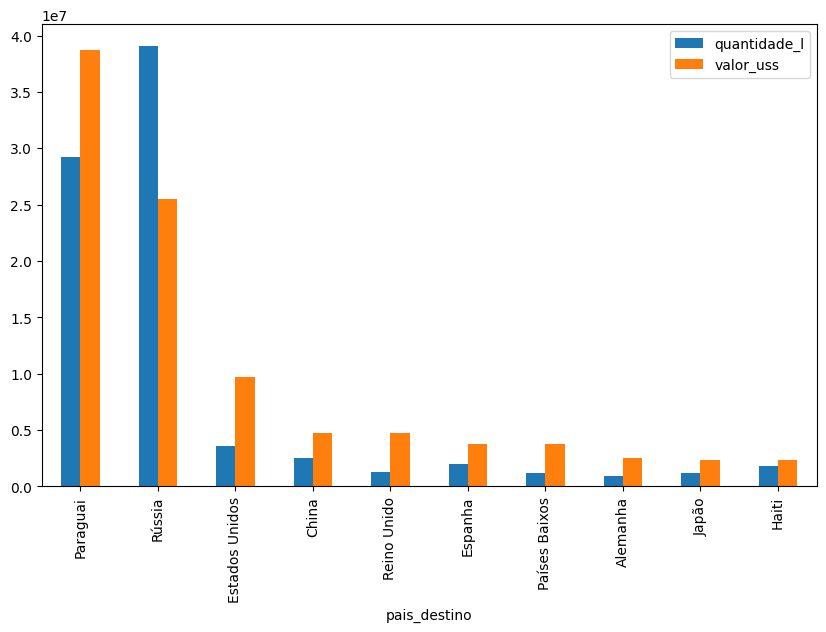

In [210]:
# falta colocar informações na label
exportacao_long_por_pais.head(10).plot(kind='bar', figsize=(10,6));

Nos últimos 15 anos, o Brasil exportou 87.982.432 litros de vinho, totalizando o valor de U$$ 112.644.316,00. Os maiores consumidores de vinhos brasileiros são Paraguai e Rússia.




Os 10 países que mais compraram do Brasil nos últimos 15 anos foram: Paraguai, Rússia, Estados Unidos, China, Reino Unido, Espanha, Países Baixos, Alemanha, Japão, Haiti




In [17]:
exportacao_long_por_pais['dolar_por_litro'] = exportacao_long_por_pais['valor_uss'] / exportacao_long_por_pais['quantidade_l']
exportacao_long_por_pais.head(10)

,quantidade_l,valor_uss,dolar_por_litro
pais_destino,,,
Paraguai,29214770,38719031,1.33
Rússia,39029799,25504484,0.65
Estados Unidos,3563355,9684567,2.72
China,2509458,4746525,1.89
Reino Unido,1239551,4711464,3.80
Espanha,1993000,3808552,1.91
Países Baixos,1236154,3791611,3.07
"Alemanha, República Democrática",909051,2546394,2.80
Japão,1181692,2377716,2.01


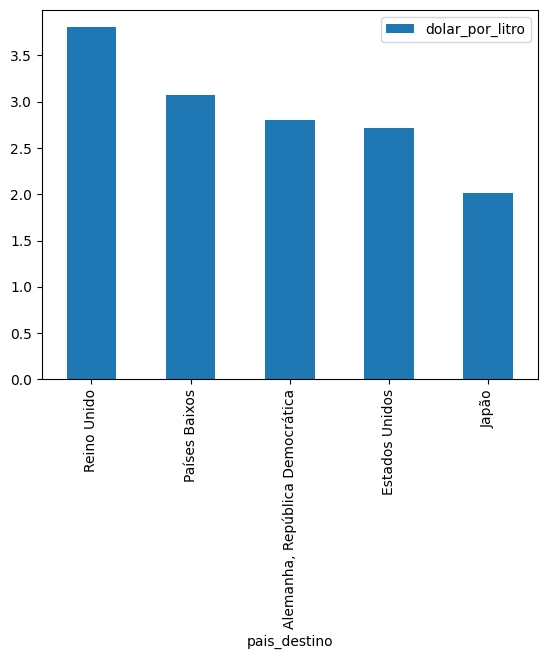

In [18]:
exportacao_long_por_dolar_por_litro = exportacao_long_por_pais.head(10)
exportacao_long_por_dolar_por_litro = exportacao_long_por_dolar_por_litro.sort_values(by='dolar_por_litro', ascending=False)
exportacao_long_por_dolar_por_litro.head(5).plot(kind='bar', y='dolar_por_litro');

Nos últimos 15 anos, as vendas mais lucrativas foram feitas para os países Reino Unido, Países Baixos, Alemanha, Estados Unidos e Japão.

In [19]:
# incluindo a coluna total nos dataframe


quantidade_l["Total_quantidade"] = quantidade_l.sum(axis=1)
valor_uss["Total_valor"] = valor_uss.sum(axis=1)

In [20]:
display(quantidade_l.head(2))
display(valor_uss.head(2))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_quantidade
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,30


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_valor
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116


In [21]:
# criando dataframe com paises que não compraram vinho do brasil

paises_comercio_zero = valor_uss[valor_uss['Total_valor'] == 0]
paises_comercio_zero

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_valor
País,,,,,,,,,,,,,,,,
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iraque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jamaica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Líbano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Porto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
República Dominicana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Senegal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# retirando dos dataframe quantidade_l e valor_uss os países que não compraram vinho com o brasil

quantidade_l_s = quantidade_l.drop(paises_comercio_zero.index, axis=0)
valor_uss_s = valor_uss.drop(paises_comercio_zero.index, axis=0)



In [23]:
# ordenando por maior quantidade e maior valor

quantidade_l_ordenado_por_total = quantidade_l_s.sort_values(by='Total_quantidade', ascending = False)
valor_uss_s_ordenado_por_total = valor_uss_s.sort_values(by='Total_valor', ascending = False)

display(quantidade_l_ordenado_por_total.head(2))
display(valor_uss_s_ordenado_por_total.head(2))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_quantidade
País,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,39029799
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,29214770


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_valor
País,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,25504484


In [24]:
# preparando os dataframes para plotagem

# passo 1: retirando a coluna total dos dataframes
quantidade_l_ordenado_por_total = quantidade_l_ordenado_por_total.drop('Total_quantidade', axis=1)
valor_uss_s_ordenado_por_total = valor_uss_s_ordenado_por_total.drop('Total_valor', axis=1)

# passo 2: criando um dataframe com 10 países que mais compraram vinho do brasil
quantidade_l_ordenado_por_total_top10 = quantidade_l_ordenado_por_total.head(10)
valor_uss_s_ordenado_por_total_top10 = valor_uss_s_ordenado_por_total.head(10)

# passo 3: transpondo os dataframe para que seja possível visualizar a serie temporal
quantidade_l_ordenado_por_total_top10 = quantidade_l_ordenado_por_total_top10.T
valor_uss_s_ordenado_por_total_top10 = valor_uss_s_ordenado_por_total_top10.T

# passo 4: mostrando os dataframes
display(quantidade_l_ordenado_por_total_top10.head(2))
display(valor_uss_s_ordenado_por_total_top10.head(2))


País,Rússia,Paraguai,Estados Unidos,China,Espanha,Haiti,Reino Unido,Países Baixos,Japão,"Alemanha, República Democrática"
2008,6207658,2191901,443895,8689,2942,20,100097,340412,232293,265742
2009,21912914,486927,372319,1553416,2181,4500,30092,171654,217974,225086


País,Paraguai,Rússia,Estados Unidos,China,Reino Unido,Espanha,Países Baixos,"Alemanha, República Democrática",Japão,Haiti
2008,1374088,2352768,804607,25926,155076,6834,783635,429970,178333,20
2009,392087,5732280,660066,482400,68788,4050,136991,393482,283436,5863
